In [51]:
from mnist.mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.optimize import minimize
from matplotlib import rcParams
from sklearn import linear_model
#from keras.datasets import mnist
#loading
#(train_X, train_y), (test_X, test_y) = mnist.load_data()

mndata = MNIST('/Users/zhaoheng/Downloads/mnist')
train_X, train_y = mndata.load_training()
test_X, test_y = mndata.load_testing()
#shape of dataset
print('X_train: ' + str(np.shape(train_X)))
print('Y_train: ' + str(np.shape(train_y)))
print('X_test:  '  + str(np.shape(test_X)))
print('Y_test:  '  + str(np.shape(test_y)))
train_X = np.reshape(train_X, (60000,28,28))
test_X = np.reshape(test_X, (10000,28,28))
print('X_train: ' + str(np.shape(train_X)))
print('Y_train: ' + str(np.shape(train_y)))
print('X_test:  '  + str(np.shape(test_X)))
print('Y_test:  '  + str(np.shape(test_y)))


X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


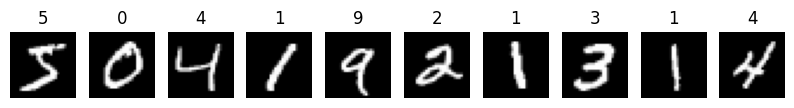

In [53]:
#show sample  digit images with label
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(str(train_y[i]))
plt.show()

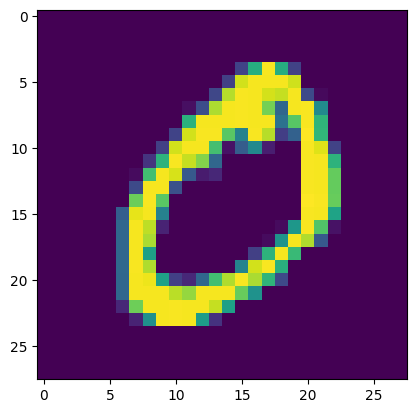

one hot of digit image [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [54]:
train_shape = np.shape(train_X)
A= np.reshape(train_X, (train_shape[0], train_shape[1]*train_shape[2])) # A size: 60000*784
#create one hot label B matrix for train data
B = np.zeros((train_shape[0], 10))
for i in range(train_shape[0]):
    B[i,train_y[i]] = 1
B.shape
plt.imshow(train_X[1])
plt.show()
print('one hot of digit image', B[1])

## compute mapping X by various solver
**solvers: pinv, Ridge, Lasso**

### 1. solve AX=B by pinv

In [110]:
#compute AX = B by least square regression(pinv)
X_pinv = np.zeros((784,10))
for k in range(10):
    beta = np.linalg.pinv(A) @ B[:,k]
    X_pinv[:,k] = beta
#X_pinv = np.linalg.pinv(A) @ B

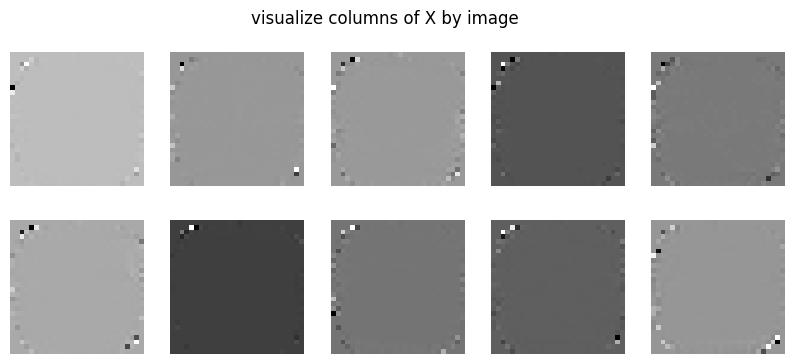

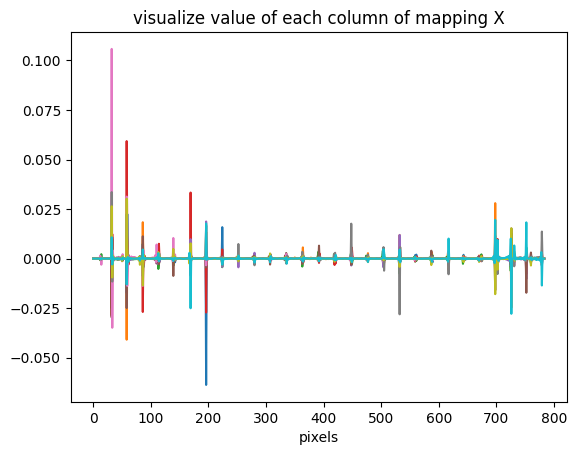

In [145]:
#plot each column of X as 28*28 images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(X_pinv[:,i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.suptitle('visualize columns of X by image')
plt.show()
#plot each column of mapping matrix X
for j in range(10):
    plt.plot(X_pinv[:,j])
    plt.xlabel('pixels')
plt.title('visualize value of each column of mapping X')
plt.show()

### solve AX=B by Lasso

In [70]:
#solve AX = B by Lasso
from sklearn import linear_model
X_Lasso = np.zeros((784,10))
for k in range(10):
    Lasso = linear_model.Lasso(alpha=1.0).fit(A,B[:,k])
    X_Lasso[:,k] = Lasso.coef_

#solve AX = B using matrix computation
#X_Lasso = linear_model.Lasso(alpha=1.0).fit(A,B).coef_
#X_Lasso = np.transpose(X_Lasso)

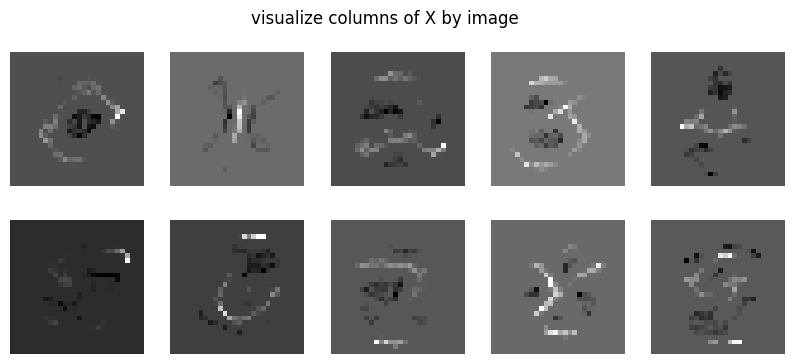

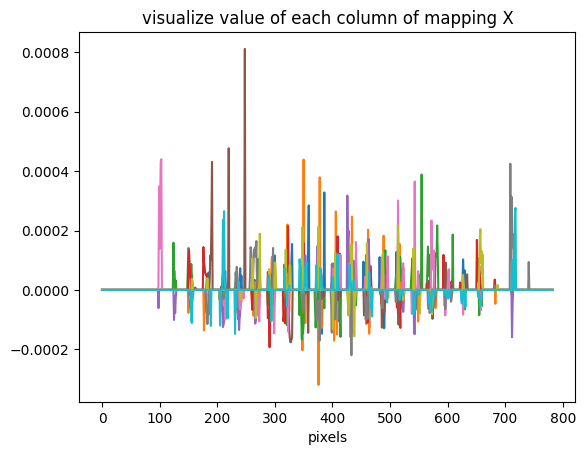

In [144]:
#plot each column of X as 28*28 images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(X_Lasso[:,i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.suptitle('visualize columns of X by image')
plt.show()

#plot each column of mapping matrix X
for j in range(10):
    plt.plot(X_Lasso[:,j])
    plt.xlabel('pixels')
plt.title('visualize value of each column of mapping X')
plt.show()

## Prediction and accuracy

In [72]:
#define functions to do prediction and calculate accuracy
def pred_acc(test_label, test_pred):
    correct = 0
    for i in range(len(test_label)):
        if test_label[i] == test_pred[i]:
            correct += 1
    accuracy = correct/len(test_label)
    return accuracy

def pred(test_image, X):
    num = np.shape(test_image)[0]
    pred = []
    for j in range(num):
        img = np.reshape(test_image[j], (1,784))
        predj = np.argmax(img @ X)
        pred.append(predj)
    return pred

**predict by pinv solver**

accuracy of test data: 0.8534


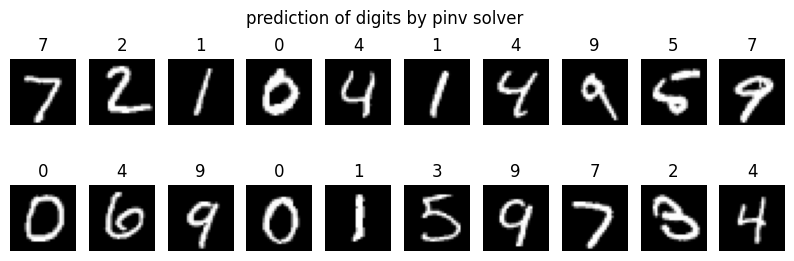

In [104]:
#predict test set
prediction = pred(test_X, X)
accuracy = pred_acc(test_y, prediction)
print('accuracy of test data:', accuracy)

plt.figure(figsize=(10,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(str(prediction[i]))
plt.suptitle('prediction of digits by pinv solver')
plt.show()

**predict by Lasso solver**

accuracy of test data: 0.777


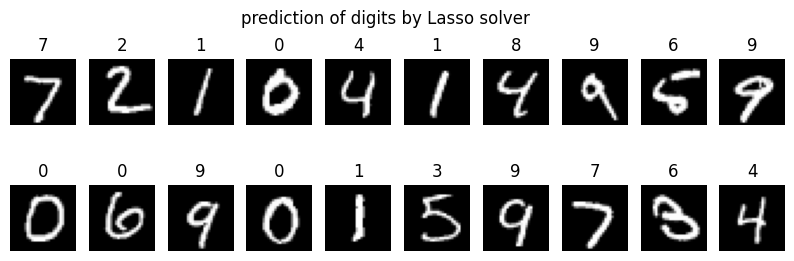

In [105]:
#predict test set
prediction = pred(test_X, X_Lasso)
accuracy = pred_acc(test_y, prediction)
print('accuracy of test data:', accuracy)

plt.figure(figsize=(10,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(str(prediction[i]))
plt.suptitle('prediction of digits by Lasso solver')
plt.show()

## Sparsity of pixels and prediction by sparse X

**print values of each column of X larger than 0.0001**

In [90]:
#print informative pixels for each digits
for i in range(10):
    X_largeV2 = np.where(np.abs(X_Lasso[:,i])>0.0001)
    print(X_largeV2)

(array([271, 300, 329, 330, 358, 359, 377, 381, 382, 386, 410, 413, 434,
       436, 437, 464, 482, 490, 511, 627]),)
(array([177, 295, 322, 348, 350, 353, 376, 378, 381, 403, 406, 408, 431,
       434, 436, 459, 462, 464, 489, 517, 549]),)
(array([124, 150, 151, 321, 347, 349, 350, 371, 414, 459, 492, 516, 517,
       518, 539, 555, 566, 568, 569, 579, 580, 581, 582, 583, 609]),)
(array([151, 176, 291, 315, 318, 323, 350, 376, 409, 461, 487, 518, 593,
       651, 653]),)
(array([125, 210, 211, 212, 238, 266, 267, 353, 374, 426, 427, 428, 460,
       463, 464, 542, 543, 712]),)
(array([188, 189, 190, 191, 220, 248, 325, 326, 327, 328, 329, 330, 347,
       358, 486, 515]),)
(array([ 99, 100, 101, 102, 103, 273, 299, 323, 375, 414, 441, 486, 496,
       514, 543, 572, 573, 575, 576]),)
(array([183, 258, 259, 264, 265, 266, 267, 268, 297, 373, 378, 399, 433,
       458, 709, 711, 712, 713, 714]),)
(array([261, 274, 319, 348, 376, 401, 405, 433, 434, 438, 460, 487, 488,
       514, 515, 5

## Predict by important pixels

In [133]:
#create sparse X
X_sparse_Lasso = np.where(np.abs(X_Lasso) <0.0001, X_Lasso, 0)
X_sparse_pinv = np.where(np.abs(X_pinv) <0.001, X_pinv, 0)

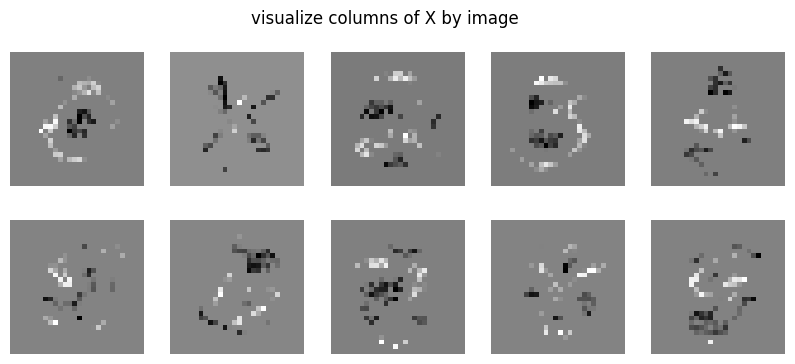

In [143]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(X_sparse_Lasso[:,i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.suptitle('visualize columns of X by image')
plt.show()

accuracy of test data: 0.6494


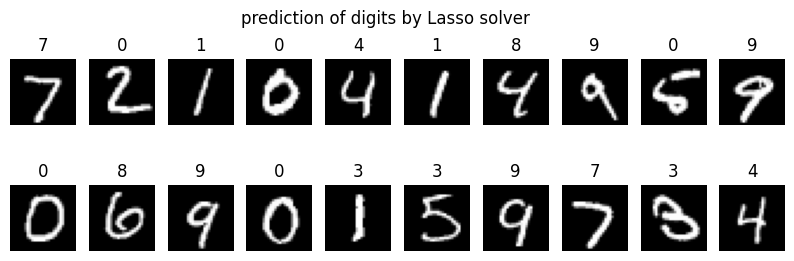

In [127]:
#predict test set
prediction = pred(test_X, X_sparse_Lasso)
accuracy = pred_acc(test_y, prediction)
print('accuracy of test data:', accuracy)

plt.figure(figsize=(10,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(str(prediction[i]))
plt.suptitle('prediction of digits by Lasso solver')
plt.show()

**sparse mapping X**

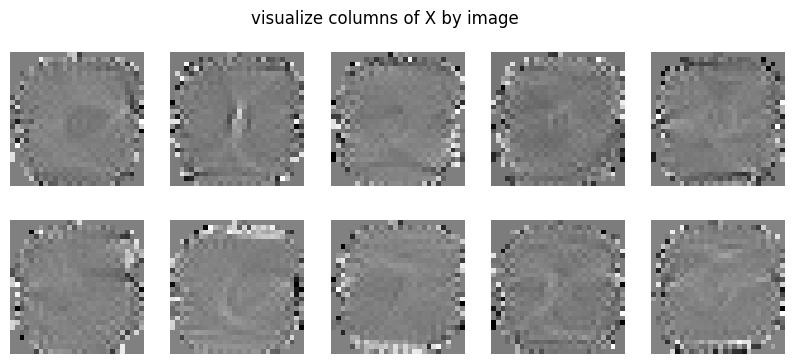

In [140]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(X_sparse_pinv[:,i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.suptitle('visualize columns of X by image')
plt.show()

**predict by sparse pinv solver**

accuracy of test data: 0.8516


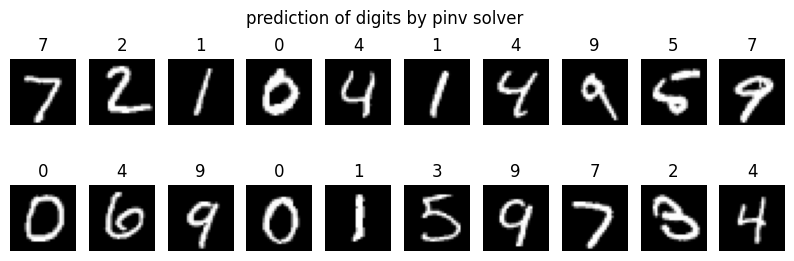

In [135]:
#predict test set
prediction = pred(test_X, X_sparse_pinv)
accuracy = pred_acc(test_y, prediction)
print('accuracy of test data:', accuracy)

plt.figure(figsize=(10,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(str(prediction[i]))
plt.suptitle('prediction of digits by pinv solver')
plt.show()